## Merge-ATO-Outputs-Geopandas.py

This script demonstrates how to merge Access to Opportunities (ATO) tables from multiple years into one shapefile. 

https://data.wfrc.org/datasets/access-to-opportunities-work-related-taz-based?geometry=-117.122%2C40.025%2C-106.669%2C41.481

#### Import required libraries

In [1]:
import geopandas as gpd
import os
import matplotlib

#### Build paths to .dbf tables and TAZ shapefile

In [2]:
# Store highest common directory path
scenarios = os.path.join(os.getcwd(), r'TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios')

# Store path to 2019
path_2019 = os.path.join(scenarios, r'BY_2019\7_PostProcessing\Access_to_Opportunity_2019.dbf')
print(path_2019 + '\n')

# Store path to 2030
path_2030 = os.path.join(scenarios, r'Need_2030\7_PostProcessing\Access_to_Opportunity_2030.dbf')
print(path_2030 + '\n')

# Store path to 2040
path_2040 = os.path.join(scenarios, r'Need_2040\7_PostProcessing\Access_to_Opportunity_2040.dbf')
print(path_2040 + '\n')

# Store path to 2050
path_2050 = os.path.join(scenarios, r'Need_2050\7_PostProcessing\Access_to_Opportunity_2050.dbf')
print(path_2050 + '\n')

# Store path to TAZ boundary
taz_boundary_path = os.path.join(os.getcwd(), r'Data\TAZ_WFRC_UTM12.shp')
print(taz_boundary_path + '\n')

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\BY_2019\7_PostProcessing\Access_to_Opportunity_2019.dbf

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\Need_2030\7_PostProcessing\Access_to_Opportunity_2030.dbf

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\Need_2040\7_PostProcessing\Access_to_Opportunity_2040.dbf

E:\Projects\Merge-ATO-Outputs\TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios\Need_2050\7_PostProcessing\Access_to_Opportunity_2050.dbf

E:\Projects\Merge-ATO-Outputs\Data\TAZ_WFRC_UTM12.shp



#### Read files into geopandas (can ingest dbfs)

In [3]:
# read tables into geopandas as dataframes
df_2019 = gpd.read_file(path_2019)
df_2030 = gpd.read_file(path_2030)
df_2040 = gpd.read_file(path_2040)
df_2050 = gpd.read_file(path_2050)

# read shapefile into as spatial dataframe
taz_boundary = gpd.read_file(taz_boundary_path)

#### Preview tables (Optional)

In [4]:
# Show the first 5 rows of a table
print(df_2019.head())
print()

# Show number of rows and columns
print(df_2019.shape)
print()

# Show column names
print(list(df_2019.columns))
print()

print(list(df_2030.columns))
print()

print(list(taz_boundary.columns))
print()

# Taz boundary only has 2858 zones, instead of 2881
print(taz_boundary.shape)
print()

   TAZID  CO_TAZID  DEVACRES    HH   JOB  AUTO_JB  AUTO_HH  TRAN_JB  TRAN_HH  \
0      1     30001    374.61   1.1   0.0    30077    20324        0        0   
1      2     30002    638.02  15.2   3.6    32960    22318        0        0   
2      3     30003    470.79   5.1   2.6    33930    22989        0        0   
3      4     30004    779.84  21.0  24.1    33229    22504        0        0   
4      5     30005    395.38  30.5  69.5    41843    28507        0        0   

   COMP_AUTO  COMP_TRAN  AUTO_JB_WT  AUTO_HH_WT  TRAN_JB_WT  TRAN_HH_WT  \
0      30077          0       33085           0           0           0   
1      31728          0      500993       80346           0           0   
2      31525          0      173044       59772           0           0   
3      29066          0      697807      542343           0           0   
4      34409          0     1276226     1981242           0           0   

  geometry  
0     None  
1     None  
2     None  
3     None  
4  

#### Preview TAZ Geometry

In [5]:
# plot the taz polygons
taz_boundary.plot(figsize=(15, 15))

#### Prepping and Formatting tables (Note the fields names have been shortened to accomodate the 10-character limit for shapefiles)

In [6]:
# Create the base table
base_table = taz_boundary[['TAZID', 'CO_TAZID', 'DEVACRES', 'geometry']].copy()

# Desired columns to subset by 
columns = ['CO_TAZID', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', \
           'COMP_AUTO', 'COMP_TRAN']

# subset tables to desired columns
df_2019_subset = df_2019[columns].copy()
df_2030_subset = df_2030[columns].copy()
df_2040_subset = df_2040[columns].copy()
df_2050_subset = df_2050[columns].copy()

# Show Column names before conversion
print("ATO 2040 Column names (BEFORE):")
print(list(df_2040_subset.columns))
print()

# Rename columns, concatenating year to the end
df_2019_subset.columns = ['CO_TAZID', 'HH_19', 'JOB_19', 'JOBAUTO_19', 'HHAUTO_19', 'JOBTRAN_19', 'HHTRANS_19', \
           'CMPAUTO_19', 'CMPTRAN_19']

df_2030_subset.columns = ['CO_TAZID', 'HH_30', 'JOB_30', 'JOBAUTO_30', 'HHAUTO_30', 'JOBTRAN_30', 'HHTRANS_30', \
           'CMPAUTO_30', 'CMPTRAN_30']

df_2040_subset.columns = ['CO_TAZID', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRAN_40', 'HHTRANS_40', \
           'CMPAUTO_40', 'CMPTRAN_40']

df_2050_subset.columns = ['CO_TAZID', 'HH_50', 'JOB_50', 'JOBAUTO_50', 'HHAUTO_50', 'JOBTRAN_50', 'HHTRANS_50', \
           'CMPAUTO_50', 'CMPTRAN_50']

# Show Column names after conversion
print("ATO 2040 Column names (AFTER):")
print(list(df_2040_subset.columns))
print()

ATO 2040 Column names (BEFORE):
['CO_TAZID', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', 'COMP_AUTO', 'COMP_TRAN']

ATO 2040 Column names (AFTER):
['CO_TAZID', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRAN_40', 'HHTRANS_40', 'CMPAUTO_40', 'CMPTRAN_40']



#### Join the tables

In [7]:
# store ATO by year into list
tables = [df_2019_subset, df_2030_subset, df_2040_subset, df_2050_subset]

# Use loop to join each year table to the base table using CO_TAZID field
ato_geotable = base_table

for table in tables:
    ato_geotable = ato_geotable.merge(table, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')
    
# Show first 5 rows of merged table
print(ato_geotable.head())
print()

print(ato_geotable.shape)
print()

   TAZID  CO_TAZID  DEVACRES  \
0   1896    491896    194.00   
1   2490    492490    163.53   
2   2493    492493    172.52   
3   2632    492632    316.82   
4   1859    491859   1391.86   

                                            geometry  HH_19  JOB_19  \
0  POLYGON ((413322.970 4468422.370, 412501.783 4...    0.0   286.6   
1  POLYGON ((446538.390 4447316.290, 446372.950 4...   36.1     0.0   
2  POLYGON ((445717.823 4447316.871, 446126.661 4...  138.2    47.6   
3  POLYGON ((442594.806 4445568.070, 442591.756 4...  192.8     0.0   
4  POLYGON ((406997.880 4470180.337, 408460.660 4...    0.0     0.0   

   JOBAUTO_19  HHAUTO_19  JOBTRAN_19  HHTRANS_19  ...  CMPAUTO_40  CMPTRAN_40  \
0       46951      37564           0           0  ...      123164        3229   
1      120924      66535           0           0  ...      191645        9107   
2      122404      68021           0           0  ...      198704        8390   
3      131160      72819           0           0  ...   

#### Plot ATO variables just for fun

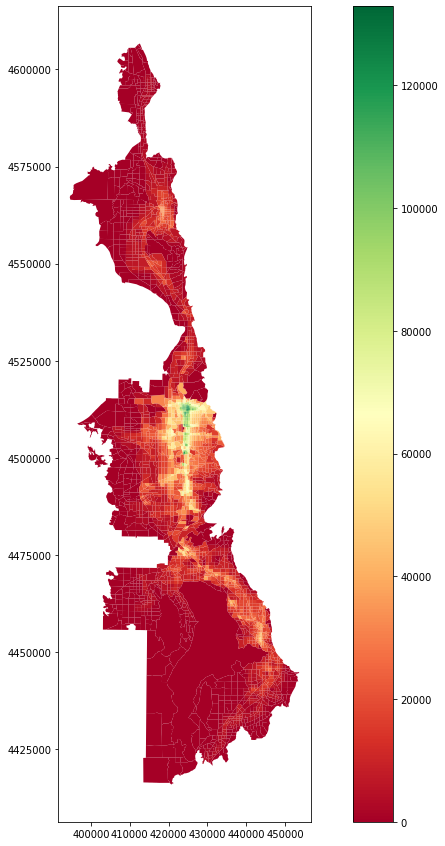

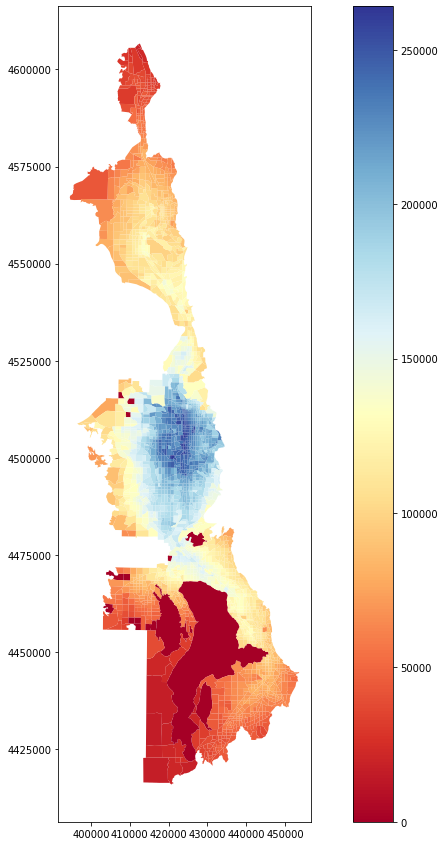

In [8]:
# Plot number of jobs accessible via Transit in 2050 by TAZ
ato_geotable.plot(column='JOBTRAN_50', figsize=(15, 15), legend=True, cmap='RdYlGn')
ato_geotable.plot(column='HHAUTO_30', figsize=(15, 15), legend=True, cmap='RdYlBu')

#### Exporting

In [9]:
# Store output folder path. There is a hidden .gitignore file here so files written won't be pushed to github
temp = os.path.join(os.getcwd(), 'Results')

# Create name for output csv
out_shape = os.path.join(temp, 'ATO.shp')

# export spatial data frame to shape
ato_geotable.to_file(out_shape, index=False)